In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [18]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

In [4]:
#profile = pp.ProfileReport(df, title='Pandas Profiling Report', minimal=True)
#profile.to_file('../data/reports/Data_salary.html')

#### Preguntas de exploración

1. ¿Qué variables influyen en el valor facturado por los profesionales?
* Salario anual de acuerdo a:
- Nivel de educación
- Género
- Empresa
- Experiencia
2. ¿Qué variables influyen y en qué % la participación de estos profesionales?

In [9]:
df_1 = df.groupby("Education").agg({"totalyearlycompensation":"mean"})
df_1

,totalyearlycompensation
Education,
Bachelor's Degree,165376.822524
Highschool,173090.000000
Master's Degree,204125.052250
No especificado,206215.082321
PhD,258606.382979
Some College,187184.713376


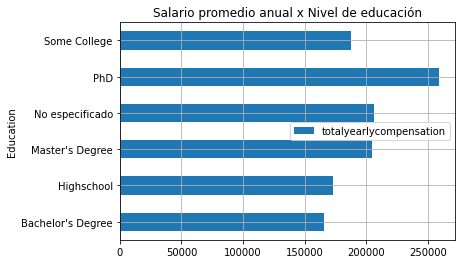

In [25]:
df_1.plot.barh(title="Salario promedio anual x Nivel de educación").grid()

In [59]:
df_2 = df.groupby("gender").agg({"totalyearlycompensation":"mean"})
df_2#.plot(kind="pie")

,totalyearlycompensation
gender,
Female,186004.488330
Male,194675.540095
No especificado,209690.642303
Other,210198.924731


In [99]:
df_3 = df.groupby('company').agg({"totalyearlycompensation":"mean"})
df_3.shape

(1617, 1)

In [101]:
#for i in df_3.T:
#    print(i)

In [91]:
df_3.loc[['Google','IBM','ibm','google']]

,totalyearlycompensation
company,
Google,258332.175639
IBM,128687.732342
ibm,108500.000000
google,230793.103448


<AxesSubplot:xlabel='company'>

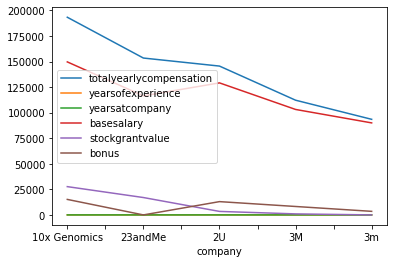

In [66]:
#Se agrupa por compañía
x_compania = df.groupby(['company']).mean()
x_compania.head().plot()